# Theano Tutorial: Basics

http://deeplearning.net/software/theano/tutorial/index.html#basics

## Adding two Scalars

In [1]:
import numpy as np
import theano.tensor as T
from theano import function

In [2]:
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y
f = function([x, y], z)

In [3]:
f(2,3)

array(5.0)

In [4]:
np.allclose(f(16.3, 12.1), 28.4)

True

In [5]:
print type(x)
print x.type
print T.dscalar
print x.type is T.dscalar

<class 'theano.tensor.var.TensorVariable'>
TensorType(float64, scalar)
TensorType(float64, scalar)
True


In [6]:
from theano import pp
print(pp(z))

(x + y)


In [7]:
np.allclose(z.eval({x : 16.3, y : 12.1}), 28.4)

True

## Adding two Matrices

In [8]:
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y
f = function([x, y], z)

In [9]:
f([[1, 2], [3, 4]],   [[10, 20], [30, 40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

In [10]:
a = np.array([[1, 2], 
              [3, 4]])
b = np.array([[10, 20], 
              [30, 40]])
f(a, b)

array([[ 11.,  22.],
       [ 33.,  44.]])

## More Examples

## Logistic Function


In [11]:
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = function([x], s)
logistic([[0, 1], [-1, -2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

In [12]:
s2 = (1 + T.tanh(x / 2)) / 2
logistic2 = function([x], s2)
logistic2([[0, 1], [-1, -2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

## Computing More than one Thing at the Same Time

In [13]:
a, b = T.dmatrices('a', 'b')
diff = a - b
abs_diff = abs(diff)
diff_squared = diff**2
f = function([a, b], [diff, abs_diff, diff_squared])

In [14]:
f([[1, 1], [1, 1]], [[0, 1], [2, 3]])

[array([[ 1.,  0.],
        [-1., -2.]]), array([[ 1.,  0.],
        [ 1.,  2.]]), array([[ 1.,  0.],
        [ 1.,  4.]])]

# Setting a Default Value for an Argument

In [15]:
from theano import In
x, y = T.dscalars('x', 'y')
z = x + y
f = function([x, In(y, value=1)], z)

print f(33)
print f(33, 2)

34.0
35.0


In [16]:
x, y, w = T.dscalars('x', 'y', 'w')
z = (x + y) * w
f = function([x, In(y, value=1), In(w, value=2, name='w_by_name')], z)

print f(33)
print f(33, 2)
print f(33, 0, 1)
print f(33, w_by_name=1)
print f(33, w_by_name=1, y=0)

68.0
70.0
33.0
34.0
33.0


## Using Shared Variables

In [17]:
from theano import shared
state = shared(0)
inc = T.iscalar('inc')
accumulator = function([inc], state, updates=[(state, state+inc)])

In [18]:
print(state.get_value())

print accumulator(1)
print(state.get_value())

print accumulator(300)
print(state.get_value())

0
0
1
1
301


In [19]:
state.set_value(-1)

print accumulator(3)
print(state.get_value())

-1
2


In [20]:
decrementor = function([inc], state, updates=[(state, state-inc)])

print decrementor(2)
print state.get_value()

2
0


In [21]:
fn_of_state = state * 2 + inc

# The type of foo must match the shared variable we are replacing
# with the ''givens''
foo = T.scalar(dtype=state.dtype)
skip_shared = function([inc, foo], fn_of_state, givens=[(state, foo)])

print skip_shared(1, 3)
print state.get_value()

7
0


## Copying functions

In [22]:
state = shared(0)
inc = T.iscalar('inc')
accumulator = function([inc], state, updates=[(state, state+inc)], on_unused_input='ignore')

In [23]:
print accumulator(10)
print state.get_value()

0
10


In [24]:
new_state = shared(0)
new_accumulator = accumulator.copy(swap={state: new_state})

print new_accumulator(100)
print new_state.get_value()

[array(0)]
100


In [25]:
print state.get_value()

10


In [26]:
null_accumulator = accumulator.copy(delete_updates=True)

In [27]:
print null_accumulator(9000)
print state.get_value()

[array(10)]
10


## Using Random Numbers

In [28]:
from theano.tensor.shared_randomstreams import RandomStreams
srng = RandomStreams(seed=234)
rv_u = srng.uniform((2,2))
rv_n = srng.normal((2,2,))
f = function([], rv_u)
g = function([], rv_n, no_default_updates=True) # not updating rv_n.rng
nearly_zeros = function([], rv_u + rv_u - 2 * rv_u)

In [29]:
f_val0 = f()
f_val1 = f()

print f_val0
print f_val1

[[ 0.12672381  0.97091597]
 [ 0.13989098  0.88754825]]
[[ 0.31971415  0.47584377]
 [ 0.24129163  0.42046081]]


In [30]:
g_val0 = g() # different numbers from f_val0 and f_val1
g_val1 = g() # same numbers as g_val0!

print g_val0
print g_val1

[[ 0.37328447 -0.65746672]
 [-0.36302373 -0.97484625]]
[[ 0.37328447 -0.65746672]
 [-0.36302373 -0.97484625]]


In [31]:
z_val0 = nearly_zeros()
print z_val0

[[ 0.  0.]
 [ 0.  0.]]


## Seeding Streams

In [32]:
rng_val = rv_u.rng.get_value(borrow=True) # Get the rng for rv_u
rng_val.seed(89234) # seeds the generator
rv_u.rng.set_value(rng_val, borrow=True) # assigns back seeded rng

In [33]:
srng.seed(902340) # seeds rv_u and rv_n with different seeds each

## Sharing Streams Between Functions

In [34]:
state_after_v0 = rv_u.rng.get_value().get_state()
nearly_zeros() # this affects the rv_u's generator

v1 = f()
print v1

rng = rv_u.rng.get_value(borrow=True)
rng.set_state(state_after_v0)
rv_u.rng.set_value(rng, borrow=True)

v2 = f() # v2 != v1
v3 = f() # v3 == v1

print v2
print v3

[[ 0.5025809   0.99544429]
 [ 0.75073355  0.17926032]]
[[ 0.33919835  0.85344878]
 [ 0.14881562  0.79659413]]
[[ 0.5025809   0.99544429]
 [ 0.75073355  0.17926032]]


## Copying Random State Between Theano Graphs

In [35]:
from __future__ import print_function
from theano.sandbox.rng_mrg import MRG_RandomStreams
from theano.tensor.shared_randomstreams import RandomStreams

In [36]:
class Graph():
    def __init__(self, seed=123):
        self.rng = RandomStreams(seed)
        self.y = self.rng.uniform(size=(1,))
    

In [37]:
g1 = Graph(seed=123)
f1 = function([], g1.y)

In [38]:
g2 = Graph(seed=987)
f2 = function([], g2.y)

In [39]:
# by default the two functions are out of sync
print(f1())
print(f2())

[ 0.72803009]
[ 0.55056769]


In [40]:
def copy_random_state(g1, g2):
    if isinstance(g1.rng, MRG_RandomStreams):
        g2.rng.rstate = g1.rng.rstate
    for (su1, su2) in zip(g1.rng.state_updates, g2.rng.state_updates):
        su2[0].set_value(su1[0].get_value())

In [41]:
copy_random_state(g1, g2)

print(f1())
print(f2())

[ 0.59044123]
[ 0.59044123]


## A Real Example: Logistic Regression

The preceeding elements are featured in this more realistic example.  It will be used repeatedly.

In [42]:
import numpy as np
import theano
import theano.tensor as T

rng = np.random

N = 400     # training sample size
feats = 784 # number of input variables (features)
training_epochs = 1000

# generate a dataset: D = (input_values, target_class)
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))

# declare Theno symbolic variables
x = T.dmatrix("x")
y = T.dvector("y")

# initialize the weight vector w randomly
#
# this and the following bias variable b 
# are shared so they keep their values
# between training iterations (updates)
w = theano.shared(rng.randn(feats), name="w")

# initialize the bias term
b = theano.shared(0., name="b")

#print("Initial model:")
#print(w.get_value())
#print(b.get_value())

# construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))  # Probability that target = 1 (sigmoid of current hypothesis w and bias b)
prediction = p_1 > 0.5                   # the prediction threshold
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # cross-entropy loss function
cost = xent.mean() + 0.01 * (w**2).sum() # the cost to minimize, combo of cross-entropy with r2 regularization of weights
gw, gb = T.grad(cost, [w, b])            # Compute the gradient of the cost w.r.t weight vector w and bias term b
                                         # (we shall return to this in a following section of this tutorial)
incorrect = ((y - prediction)**2).sum()  # calculate the number of correct predictions

# compile the graph
train = theano.function(
           inputs=[x,y],
           outputs=[prediction, xent],
           updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs=prediction)
incor = theano.function(inputs=[x,y], outputs=incorrect)

# train
for epoch in range(training_epochs):
    pred, err = train(D[0], D[1])
    if epoch % 100 == 0:
        inc = incor(D[0], D[1])
        print("epoch %d: training error: %f, performance %d incorrect / %d" % (epoch, err.mean(), inc, N))
    
#print("Final model:")
#print(w.get_value())
#print(b.get_value())

#print("target values for D:")
#print(D[1])
#print("prediction on D:")
#print(predict(D[0]))
print("final performance %d incorrect out of %d" % (incor(D[0], D[1]), N))

epoch 0: training error: 12.227504, performance 203 incorrect / 400
epoch 100: training error: 2.845155, performance 104 incorrect / 400
epoch 200: training error: 0.378800, performance 22 incorrect / 400
epoch 300: training error: 0.057231, performance 1 incorrect / 400
epoch 400: training error: 0.036747, performance 0 incorrect / 400
epoch 500: training error: 0.033881, performance 0 incorrect / 400
epoch 600: training error: 0.034411, performance 0 incorrect / 400
epoch 700: training error: 0.036138, performance 0 incorrect / 400
epoch 800: training error: 0.038410, performance 0 incorrect / 400
epoch 900: training error: 0.040827, performance 0 incorrect / 400
final performance 0 incorrect out of 400


# Derivatives in Theano
## Computing Gradients

In [43]:
from theano import pp

x = T.dscalar('x')
y = x**2
gy = T.grad(y, x)
print(pp(gy)) # print out the gradient prior to optimization

f = theano.function([x], gy)
print(f(4))
print(np.allclose(f(94.2), 118.4))

print(pp(f.maker.fgraph.outputs[0]))

((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))
8.0
False
(TensorConstant{2.0} * x)


In [44]:
x = T.dmatrix('x')
s = T.sum(1 / (1 + T.exp(-x)))
gs = T.grad(s, x)
dlogistic = theano.function([x], gs)
print(dlogistic([[0, 1], [-1, -2]]))

[[ 0.25        0.19661193]
 [ 0.19661193  0.10499359]]


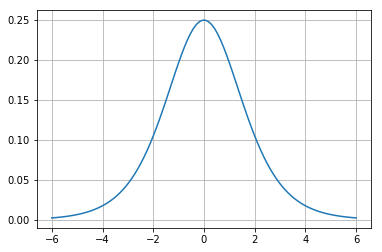

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
xvals = np.linspace(-6, 6, 100)
yvals = dlogistic(xvals.reshape(10,10))
plt.figure()
plt.plot(xvals, yvals.reshape(100))
plt.grid()

## Computing the Jacobian

In [46]:
# the code to do it manually as shown in the tutorial
x = T.dvector('x')
y = x**2

J, updates = theano.scan(lambda i, y, x: T.grad(y[i], x), sequences=T.arange(y.shape[0]), non_sequences=[y, x])
f = theano.function([x], J, updates=updates)

print(f([4, 4]))

[[ 8.  0.]
 [ 0.  8.]]


In [47]:
# use the Theano macro instead to compute the Jacobian
x = T.dvector('x')
y = x**2
J = theano.gradient.jacobian(y, x)
f = theano.function([x], J)

print(f([4,4]))

[[ 8.  0.]
 [ 0.  8.]]


# Computing the Hessian

In [48]:
# again first code it manually using theano.scan as shown in tutorial
x = T.dvector('x')
y = x**2
cost = y.sum()

gy = T.grad(cost, x)
H, updates = theano.scan(lambda i, gy, x: T.grad(gy[i], x), sequences=T.arange(gy.shape[0]), non_sequences=[gy, x])
f = theano.function([x], H, updates=updates)
print(f([4, 4]))

[[ 2.  0.]
 [ 0.  2.]]


In [49]:
# use the Theano macro instead to compute the Hessian
x = T.dvector('x')
y = x**2
cost = y.sum()

H = theano.gradient.hessian(cost, x)
f = theano.function([x], H)

print(f([4, 4]))

[[ 2.  0.]
 [ 0.  2.]]


## Jacobian times a Vector

## R-operator
Evaluate the product between a Jacobian and a vector.

In [50]:
W = T.dmatrix('W')
V = T.dmatrix('V')
x = T.dvector('x')
y = T.dot(x, W)
JV = T.Rop(y, W, V)
f = theano.function([W, V, x], JV)

print(f([[1, 1], [1, 1]], [[2, 2], [2, 2]], [0, 1]))

[ 2.  2.]


## L-operator
In similar manner, L-operator computes row vector times the Jacobian.

In [51]:
W = T.dmatrix('W')
v = T.dvector('v')
x = T.dvector('x')
y = T.dot(x, W)
VJ = T.Lop(y, W, v)
f = theano.function([v, x], VJ)

print(f([2, 2], [0, 1]))

[[ 0.  0.]
 [ 2.  2.]]


## Hessian times a Vector


In [52]:
# first method
x = T.dvector('x')
v = T.dvector('v')
y = T.sum(x ** 2)
gy = T.grad(y, x)
vH = T.grad(T.sum(gy * v), x)
f = theano.function([x, v], vH)

print(f([4, 4], [2, 2]))

[ 4.  4.]


In [53]:
# second method making use of the R-operator
x = T.dvector('x')
v = T.dvector('v')
y = T.sum(x ** 2)
gy = T.grad(y, x)
Hv = T.Rop(gy, x, v)
f = theano.function([x, v], Hv)

print(f([4, 4], [2, 2]))

[ 4.  4.]


# Conditions

## IfElse vs. Switch

In [54]:
from theano.ifelse import ifelse
import theano, time, numpy

a,b = T.scalars('a', 'b')
x,y = T.matrices('x', 'y')

z_switch = T.switch(T.lt(a, b), T.mean(x), T.mean(y))
z_lazy = ifelse(T.lt(a, b), T.mean(x), T.mean(y))

f_switch = theano.function([a, b, x, y], z_switch,
                           mode=theano.Mode(linker='vm'))
f_lazyifelse = theano.function([a, b, x, y], z_lazy,
                               mode=theano.Mode(linker='vm'))

val1 = 0.
val2 = 1.
big_mat1 = numpy.ones((10000, 1000))
big_mat2 = numpy.ones((10000, 1000))

n_times = 10

tic = time.clock()
for i in range(n_times):
    f_switch(val1, val2, big_mat1, big_mat2)
print('time spent evaluating both values %f sec' % (time.clock() - tic))

tic = time.clock()
for i in range(n_times):
    f_lazyifelse(val1, val2, big_mat1, big_mat2)
print('time spent evaluating one value %f sec' % (time.clock() - tic))

time spent evaluating both values 0.270000 sec
time spent evaluating one value 0.140000 sec


## Loop

In [55]:
## Scan Example: Computing tanh(x(t).dot(W) + b) elementwise

# defining the tensor variables
X = T.matrix("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")

results, updates = theano.scan(lambda v: T.tanh(T.dot(v, W) + b_sym), sequences=X)
compute_elementwise = theano.function(inputs=[X, W, b_sym], outputs=results)

# test values
x = np.eye(2, dtype=theano.config.floatX)
w = np.ones((2, 2), dtype=theano.config.floatX)
b = np.ones((2), dtype=theano.config.floatX)
b[1] = 2

print(compute_elementwise(x, w, b))

# comparison with numpy
print(np.tanh(x.dot(w) + b))

[[ 0.96402758  0.99505475]
 [ 0.96402758  0.99505475]]
[[ 0.96402758  0.99505475]
 [ 0.96402758  0.99505475]]


In [56]:
## Scan Example: Computing the sequence x(t) = tanh(x(t - 1).dot(W) + y(t).dot(U) + p(T - t).dot(V))

# define tensor variables
X = T.vector("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")
U = T.matrix("U")
Y = T.matrix("Y")
V = T.matrix("V")
P = T.matrix("P")

results, updates = theano.scan(lambda y, p, x_tm1: T.tanh(T.dot(x_tm1, W) + T.dot(y, U) + T.dot(p, V)),
          sequences=[Y, P[::-1]], outputs_info=[X])
compute_seq = theano.function(inputs=[X, W, Y, U, P, V], outputs=results)

# test values
x = np.zeros((2), dtype=theano.config.floatX)
x[1] = 1
w = np.ones((2, 2), dtype=theano.config.floatX)
y = np.ones((5, 2), dtype=theano.config.floatX)
y[0, :] = -3
u = np.ones((2, 2), dtype=theano.config.floatX)
p = np.ones((5, 2), dtype=theano.config.floatX)
p[0, :] = 3
v = np.ones((2, 2), dtype=theano.config.floatX)

print(compute_seq(x, w, y, u, p, v))

# comparison with numpy
x_res = np.zeros((5, 2), dtype=theano.config.floatX)
x_res[0] = np.tanh(x.dot(w) + y[0].dot(u) + p[4].dot(v))
for i in range(1, 5):
    x_res[i] = np.tanh(x_res[i - 1].dot(w) + y[i].dot(u) + p[4-i].dot(v))
print(x_res)

[[-0.99505475 -0.99505475]
 [ 0.96471973  0.96471973]
 [ 0.99998585  0.99998585]
 [ 0.99998771  0.99998771]
 [ 1.          1.        ]]
[[-0.99505475 -0.99505475]
 [ 0.96471973  0.96471973]
 [ 0.99998585  0.99998585]
 [ 0.99998771  0.99998771]
 [ 1.          1.        ]]


In [57]:
## Scan Example: Computing norms of lines of X

# define tensor variable
X = T.matrix("X")
results, updates = theano.scan(lambda x_i: T.sqrt((x_i ** 2).sum()), sequences=[X])
compute_norm_lines = theano.function(inputs=[X], outputs=results)

# test value
x = np.diag(np.arange(1, 6, dtype=theano.config.floatX), 1)
print(compute_norm_lines(x))

# comparison with numpy
print(np.sqrt((x ** 2).sum(1)))

[ 1.  2.  3.  4.  5.  0.]
[ 1.  2.  3.  4.  5.  0.]


In [58]:
## Scan Example: Computing norms of columns of X

# define tensor variable
X = T.matrix("X")
results, updates = theano.scan(lambda x_i: T.sqrt((x_i ** 2).sum()), sequences=[X.T])
compute_norm_cols = theano.function(inputs=[X], outputs=results)

# test value
x = np.diag(np.arange(1, 6, dtype=theano.config.floatX), 1)
print(compute_norm_cols(x))

# comparison with numpy
print(np.sqrt((x ** 2).sum(0)))

[ 0.  1.  2.  3.  4.  5.]
[ 0.  1.  2.  3.  4.  5.]


In [59]:
## Scan Example: Computing trace of X

floatX = "float32"

# define tensor variable
X = T.matrix("X")
results, updates = theano.scan(lambda i, j, t_f: T.cast(X[i, j] + t_f, floatX),
                  sequences=[T.arange(X.shape[0]), T.arange(X.shape[1])],
                  outputs_info=np.asarray(0., dtype=floatX))
result = results[-1]
compute_trace = theano.function(inputs=[X], outputs=result)

# test value
x = np.eye(5, dtype=theano.config.floatX)
x[0] = np.arange(5, dtype=theano.config.floatX)
print(compute_trace(x))

# comparison with numpy
print(np.diagonal(x).sum())

4.0
4.0


In [60]:
## Scan Example: computing the sequence x(t) = x(t - 2).dot(U) + x(t - 1).dot(V) + tanh(x(t - 1).dot(W) + b)

# define tensor variables
X = T.matrix("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")
U = T.matrix("U")
V = T.matrix("V")
n_sym = T.iscalar("n_sym")

results, updates = theano.scan(lambda x_tm2, x_tm1: T.dot(x_tm2, U) + T.dot(x_tm1, V) + T.tanh(T.dot(x_tm1, W) + b_sym),
                    n_steps=n_sym, outputs_info=[dict(initial=X, taps=[-2, -1])])
compute_seq2 = theano.function(inputs=[X, U, V, W, b_sym, n_sym], outputs=results)

# test values
x = np.zeros((2, 2), dtype=theano.config.floatX) # the initial value must be able to return x[-2]
x[1, 1] = 1
w = 0.5 * np.ones((2, 2), dtype=theano.config.floatX)
u = 0.5 * (np.ones((2, 2), dtype=theano.config.floatX) - np.eye(2, dtype=theano.config.floatX))
v = 0.5 * np.ones((2, 2), dtype=theano.config.floatX)
n = 10
b = np.ones((2), dtype=theano.config.floatX)

print(compute_seq2(x, u, v, w, b, n))

# comparison with numpy
x_res = np.zeros((10, 2))
x_res[0] = x[0].dot(u) + x[1].dot(v) + np.tanh(x[1].dot(w) + b)
x_res[1] = x[1].dot(u) + x_res[0].dot(v) + np.tanh(x_res[0].dot(w) + b)
x_res[2] = x_res[0].dot(u) + x_res[1].dot(v) + np.tanh(x_res[1].dot(w) + b)
for i in range(2, 10):
    x_res[i] = (x_res[i - 2].dot(u) + x_res[i - 1].dot(v) +
                np.tanh(x_res[i - 1].dot(w) + b))
print(x_res)

[[  1.40514825   1.40514825]
 [  2.88898899   2.38898899]
 [  4.34018291   4.34018291]
 [  6.53463142   6.78463142]
 [  9.82972243   9.82972243]
 [ 14.22203814  14.09703814]
 [ 20.07439936  20.07439936]
 [ 28.12291843  28.18541843]
 [ 39.1913681   39.1913681 ]
 [ 54.28407732  54.25282732]]
[[  1.40514825   1.40514825]
 [  2.88898899   2.38898899]
 [  4.34018291   4.34018291]
 [  6.53463142   6.78463142]
 [  9.82972243   9.82972243]
 [ 14.22203814  14.09703814]
 [ 20.07439936  20.07439936]
 [ 28.12291843  28.18541843]
 [ 39.1913681   39.1913681 ]
 [ 54.28407732  54.25282732]]


In [61]:
## Scan Example: Computing the Jacobian of  y = tanh(v.dot(A)) wrt x

# define tensor variables
v = T.vector()
A = T.matrix()
y = T.tanh(T.dot(v, A))
results, updates = theano.scan(lambda i: T.grad(y[i], v), sequences=[T.arange(y.shape[0])])
compute_jac_t = theano.function([A, v], results, allow_input_downcast=True) # shape (d_out, d_in)

# test values
x = np.eye(5, dtype=theano.config.floatX)[0]
w = np.eye(5, 3, dtype=theano.config.floatX)
w[2] = np.ones((3), dtype=theano.config.floatX)
print(compute_jac_t(w, x))

# compare with numpy
print(((1 - np.tanh(x.dot(w)) ** 2) * w).T)

[[ 0.41997434  0.          0.41997434  0.          0.        ]
 [ 0.          1.          1.          0.          0.        ]
 [ 0.          0.          1.          0.          0.        ]]
[[ 0.41997434  0.          0.41997434  0.          0.        ]
 [ 0.          1.          1.          0.          0.        ]
 [ 0.          0.          1.          0.          0.        ]]


In [62]:
## Scan Example: Accumulate number of loop during a scan

# define shared variables
k = theano.shared(0)
n_sym = T.iscalar("n_sym")

results, updates = theano.scan(lambda:{k:(k + 1)}, n_steps=n_sym)
accumulator = theano.function([n_sym], [], updates=updates, allow_input_downcast=True)

k.get_value()
accumulator(5)
k.get_value()

array(5)

In [63]:
## Scan Example: Computing tanh(v.dot(W) + b) * d where d is binomial

# define tensor variables
X = T.matrix("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")

# define shared random stream
trng = T.shared_randomstreams.RandomStreams(1234)
d=trng.binomial(size=W[1].shape)

results, updates = theano.scan(lambda v: T.tanh(T.dot(v, W) + b_sym) * d, sequences=X)
compute_with_bnoise = theano.function(inputs=[X, W, b_sym], outputs=results,
                          updates=updates, allow_input_downcast=True)
x = np.eye(10, 2, dtype=theano.config.floatX)
w = np.ones((2, 2), dtype=theano.config.floatX)
b = np.ones((2), dtype=theano.config.floatX)

print(compute_with_bnoise(x, w, b))

[[ 0.96402758  0.        ]
 [ 0.          0.96402758]
 [ 0.          0.        ]
 [ 0.76159416  0.76159416]
 [ 0.76159416  0.        ]
 [ 0.          0.76159416]
 [ 0.          0.76159416]
 [ 0.          0.76159416]
 [ 0.          0.        ]
 [ 0.76159416  0.76159416]]


In [64]:
## Scan Example: Computing pow(A, k)

k = T.iscalar("k")
A = T.vector("A")

def inner_fct(prior_result, B):
    return prior_result * B

# Symbolic description of the result
result, updates = theano.scan(fn=inner_fct,
                            outputs_info=T.ones_like(A),
                            non_sequences=A, n_steps=k)

# Scan has provided us with A ** 1 through A ** k.  Keep only the last
# value. Scan notices this and does not waste memory saving them.
final_result = result[-1]

power = theano.function(inputs=[A, k], outputs=final_result,
                      updates=updates)

print(power(range(10), 2))

[  0.   1.   4.   9.  16.  25.  36.  49.  64.  81.]


In [65]:
## Scan Example: Calculating a Polynomial

theano.config.warn.subtensor_merge_bug = False

coefficients = theano.tensor.vector("coefficients")
x = T.scalar("x")
max_coefficients_supported = 10000

# Generate the components of the polynomial
full_range=theano.tensor.arange(max_coefficients_supported)
components, updates = theano.scan(fn=lambda coeff, power, free_var:
                                   coeff * (free_var ** power),
                                outputs_info=None,
                                sequences=[coefficients, full_range],
                                non_sequences=x)

polynomial = components.sum()
calculate_polynomial = theano.function(inputs=[coefficients, x],
                                     outputs=polynomial)

test_coeff = numpy.asarray([1, 0, 2], dtype=numpy.float32)
print(calculate_polynomial(test_coeff, 3))

19.0


## How Shape Information is Handled by Theano

In [66]:
x = theano.tensor.matrix('x')
f = theano.function([x], (x ** 2).shape)
theano.printing.debugprint(f) 


MakeVector{dtype='int64'} [id A] ''   2
 |Shape_i{0} [id B] ''   1
 | |x [id C]
 |Shape_i{1} [id D] ''   0
   |x [id C]


## Shape Inference Problem

In [67]:
x = theano.tensor.matrix('x')
y = theano.tensor.matrix('y')
z = theano.tensor.join(0, x, y)
xv = numpy.random.rand(5, 4)
yv = numpy.random.rand(3, 3)
f = theano.function([x, y], z.shape)
theano.printing.debugprint(f) 

print(f(xv, yv)) # DOES NOT RAISE AN ERROR AS SHOULD BE.

f = theano.function([x,y], z)# Do not take the shape.
theano.printing.debugprint(f) 

#print(f(xv, yv)) # will cause a ValueErro

MakeVector{dtype='int64'} [id A] ''   4
 |Elemwise{Add}[(0, 0)] [id B] ''   3
 | |Shape_i{0} [id C] ''   1
 | | |x [id D]
 | |Shape_i{0} [id E] ''   2
 |   |y [id F]
 |Shape_i{1} [id G] ''   0
   |x [id D]
[8 4]
Join [id A] ''   0
 |TensorConstant{0} [id B]
 |x [id C]
 |y [id D]


## Specifying Exact Shape

In [68]:
x = theano.tensor.matrix()
x_specify_shape = theano.tensor.specify_shape(x, (2, 2))
f = theano.function([x], (x_specify_shape ** 2).shape)
theano.printing.debugprint(f) 

DeepCopyOp [id A] ''   0
 |TensorConstant{(2,) of 2} [id B]
